In [1]:
#Import all necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data
from sklearn.preprocessing import scale

# To perform KMeans clustering 
from sklearn.cluster import KMeans

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# DATA PREPARATION 

#### Data Loading


In [2]:
countr = pd.read_csv('Country-data.csv')
countr.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
countr.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [4]:
countr['country'].dtype

dtype('O')

In [5]:
countr['country'].value_counts()

Georgia                           1
Cote d'Ivoire                     1
Grenada                           1
Algeria                           1
Senegal                           1
Thailand                          1
Sudan                             1
Bosnia and Herzegovina            1
Venezuela                         1
Solomon Islands                   1
Libya                             1
Bolivia                           1
Bhutan                            1
Poland                            1
Mali                              1
Uruguay                           1
Vanuatu                           1
Cameroon                          1
Netherlands                       1
Tonga                             1
Uganda                            1
Romania                           1
Turkmenistan                      1
Greece                            1
Guinea-Bissau                     1
Brazil                            1
Germany                           1
Rwanda                      

In [6]:
countr.shape

(167, 10)

#### Data Inspection

In [7]:
countr.describe()

child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [8]:
countr.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [9]:
len(list(countr['country'].unique()))

167

In [10]:
# data Quality Check

countr['exports'] = countr['exports']*countr['gdpp']/100
# Similarly do for imports and health.

In [11]:
countr['imports'] = countr['imports']*countr['gdpp']/100


In [12]:
countr['health'] = countr['health']*countr['gdpp']/100


In [13]:

#basic data checks
countr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


#### Data Cleaning

In [14]:
#basic data cleaning checks
countr.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

## Exploratory Data Analysis

In [15]:
# New dataframe with only Numeric variables, for scaling

num_countr=countr[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']].copy()

In [16]:
num_countr.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [17]:
col = list(num_countr.columns)
col

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

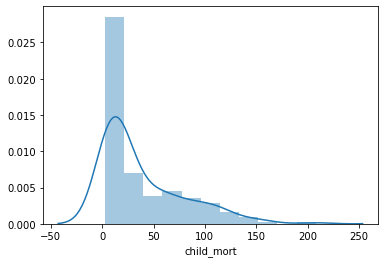

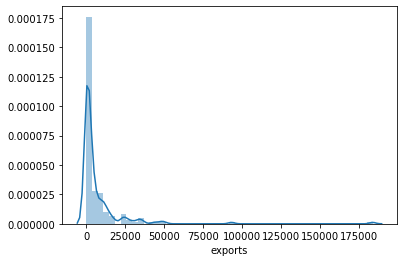

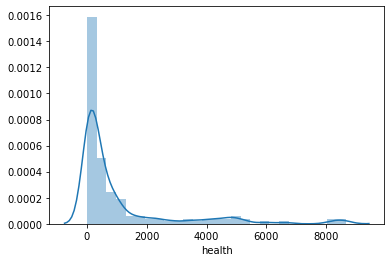

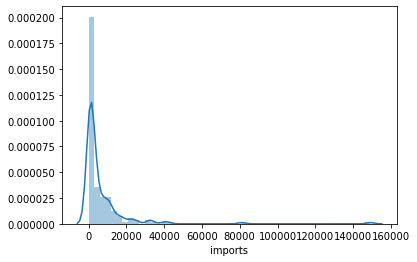

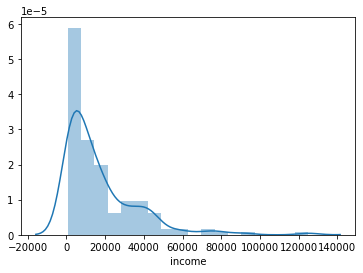

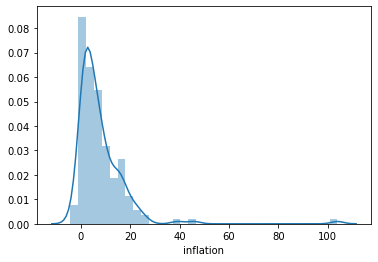

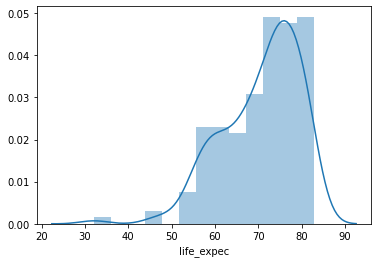

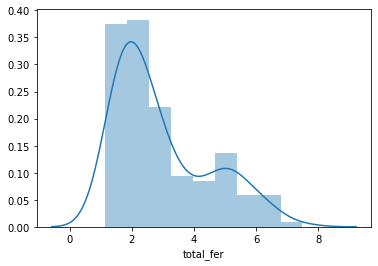

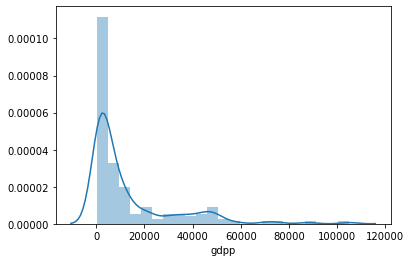

In [18]:
for c in col:
    sns.distplot(num_countr[c])
    plt.show();

In [19]:
countr[col].corr()

child_mort   exports    health   imports    income  inflation  \
child_mort    1.000000 -0.297230 -0.430438 -0.319138 -0.524315   0.288276   
exports      -0.297230  1.000000  0.612919  0.987686  0.725351  -0.141553   
health       -0.430438  0.612919  1.000000  0.638581  0.690857  -0.253956   
imports      -0.319138  0.987686  0.638581  1.000000  0.672056  -0.179458   
income       -0.524315  0.725351  0.690857  0.672056  1.000000  -0.147756   
inflation     0.288276 -0.141553 -0.253956 -0.179458 -0.147756   1.000000   
life_expec   -0.886676  0.377694  0.545626  0.397515  0.611962  -0.239705   
total_fer     0.848478 -0.291096 -0.407984 -0.317061 -0.501840   0.316921   
gdpp         -0.483032  0.768894  0.916593  0.755114  0.895571  -0.221631   

            life_expec  total_fer      gdpp  
child_mort   -0.886676   0.848478 -0.483032  
exports       0.377694  -0.291096  0.768894  
health        0.545626  -0.407984  0.916593  
imports       0.397515  -0.317061  0.755114  
income        0.611962  -0.501840  0.895571  
inflation    -0.239705   0.316921 -0.221631  
life_expec    1.000000  -0.760875  0.600089  
total_fer    -0.760875   1.000000 -0.454910  
gdpp          0.600089  -0.454910  1.000000

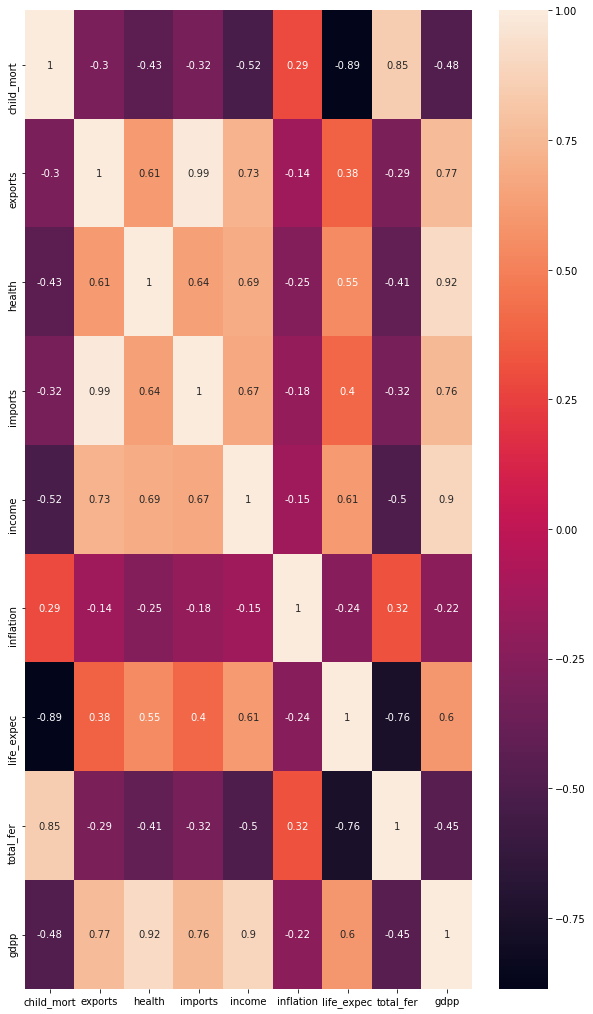

In [20]:
plt.figure(figsize=(10,18))
sns.heatmap(countr[col].corr(), annot=True);

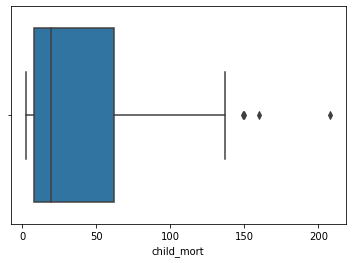

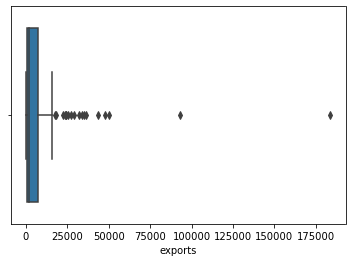

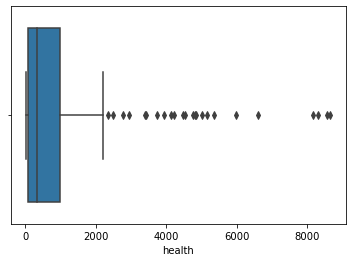

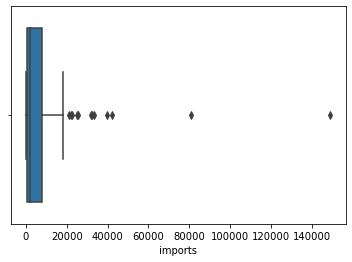

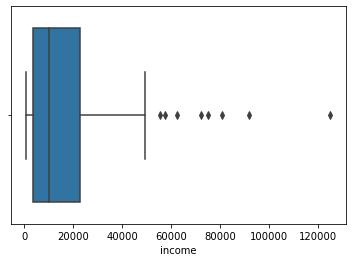

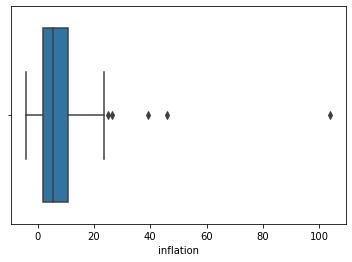

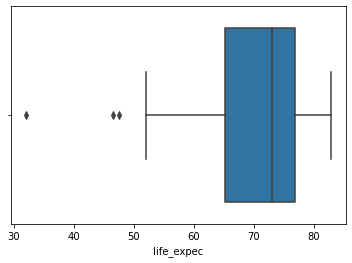

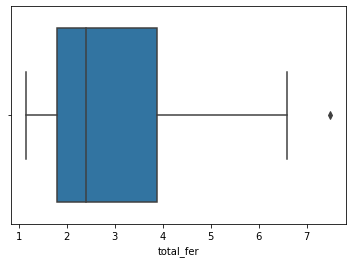

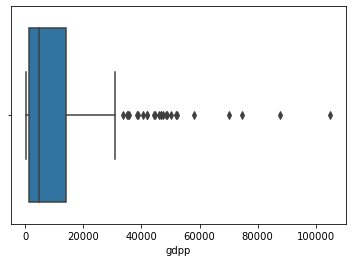

In [21]:
for c in col:
    sns.boxplot(num_countr[c])
    plt.show();

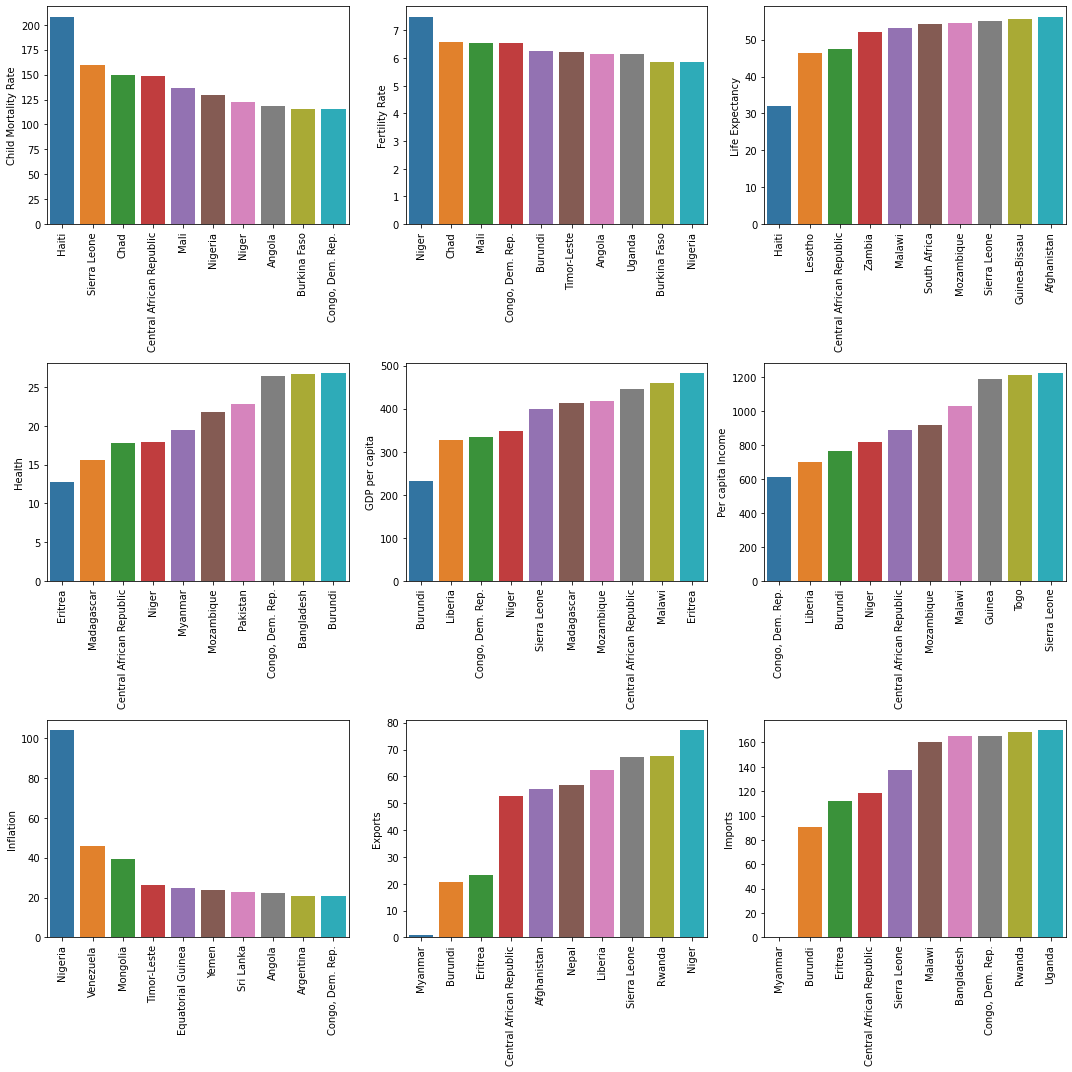

In [22]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

# Child Mortality Rate : Death of children under 5 years of age per 1000 live births

top10_child_mort = countr[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='child_mort', data= top10_child_mort, ax = axs[0,0])
plt1.set(xlabel = '', ylabel= 'Child Mortality Rate')

# Fertility Rate: The number of children that would be born to each woman if the current age-fertility rates remain the same
top10_total_fer = countr[['country','total_fer']].sort_values('total_fer', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='total_fer', data= top10_total_fer, ax = axs[0,1])
plt1.set(xlabel = '', ylabel= 'Fertility Rate')

# Life Expectancy: The average number of years a new born child would live if the current mortality patterns are to remain same

bottom10_life_expec = countr[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='life_expec', data= bottom10_life_expec, ax = axs[0,2])
plt1.set(xlabel = '', ylabel= 'Life Expectancy')

# Health :Total health spending as percentage of Total GDP.

bottom10_health = countr[['country','health']].sort_values('health', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='health', data= bottom10_health, ax = axs[1,0])
plt1.set(xlabel = '', ylabel= 'Health')

# The GDP per capita : Calculated as the Total GDP divided by the total population.

bottom10_gdpp = countr[['country','gdpp']].sort_values('gdpp', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='gdpp', data= bottom10_gdpp, ax = axs[1,1])
plt1.set(xlabel = '', ylabel= 'GDP per capita')

# Per capita Income : Net income per person

bottom10_income = countr[['country','income']].sort_values('income', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='income', data= bottom10_income, ax = axs[1,2])
plt1.set(xlabel = '', ylabel= 'Per capita Income')


# Inflation: The measurement of the annual growth rate of the Total GDP

top10_inflation = countr[['country','inflation']].sort_values('inflation', ascending = False).head(10)
plt1 = sns.barplot(x='country', y='inflation', data= top10_inflation, ax = axs[2,0])
plt1.set(xlabel = '', ylabel= 'Inflation')


# Exports: Exports of goods and services. Given as percentage of the Total GDP

bottom10_exports = countr[['country','exports']].sort_values('exports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='exports', data= bottom10_exports, ax = axs[2,1])
plt1.set(xlabel = '', ylabel= 'Exports')


# Imports: Imports of goods and services. Given as percentage of the Total GDP

bottom10_imports = countr[['country','imports']].sort_values('imports', ascending = True).head(10)
plt1 = sns.barplot(x='country', y='imports', data= bottom10_imports, ax = axs[2,2])
plt1.set(xlabel = '', ylabel= 'Imports')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation = 90)
    
plt.tight_layout()
plt.savefig('eda')
plt.show()


#### Bivariate Analysis


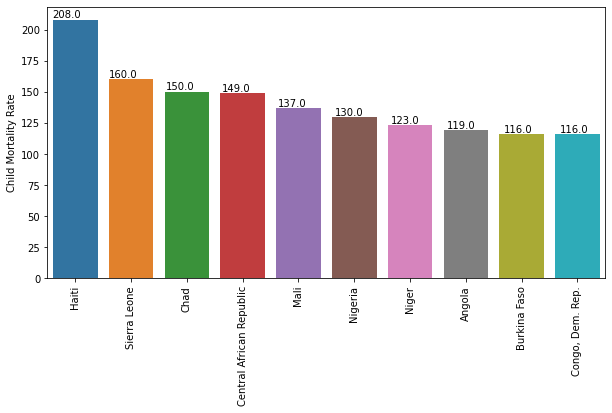

In [23]:
## to check Top 10 Highest Child Mortality Rated Countries
plt.figure(figsize = (10,5))
child_mort_top10 = countr[['country','child_mort']].sort_values('child_mort', ascending = False).head(10)
ax = sns.barplot(x='country', y='child_mort', data = child_mort_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Child Mortality Rate')
plt.xticks(rotation=90)
plt.show()

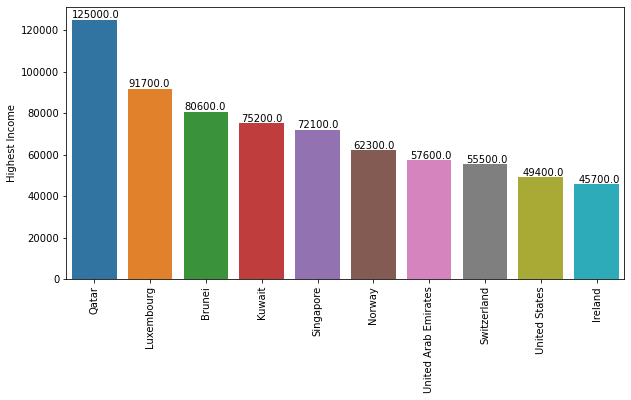

In [24]:
## countries having highest netincome per person 
plt.figure(figsize = (10,5))
child_income_top10 = countr[['country','income']].sort_values('income', ascending = False).head(10)
ax = sns.barplot(x='country', y='income',data= child_income_top10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Highest Income')
plt.xticks(rotation=90)
plt.show()

Qatar Having Highest Net income per person



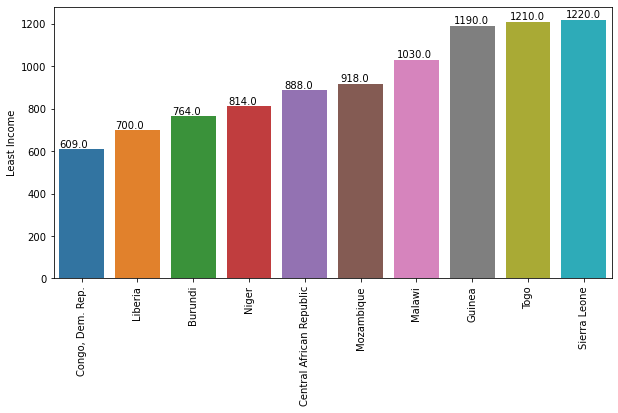

In [25]:
### countries having least net income per person 
plt.figure(figsize = (10,5))
child_income_least10 = countr[['country','income']].sort_values('income', ascending = True).head(10)
ax = sns.barplot(x='country', y='income', data= child_income_least10)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'Least Income')
plt.xticks(rotation=90)
plt.show()

We can see that these are Top 10 poor countries having least net income per person
There are some countries like Congo, Dem.republic , Niger , Sierra Leone having Highest child mortality rate and least netincome per person. These states that they cant afford for medical aid

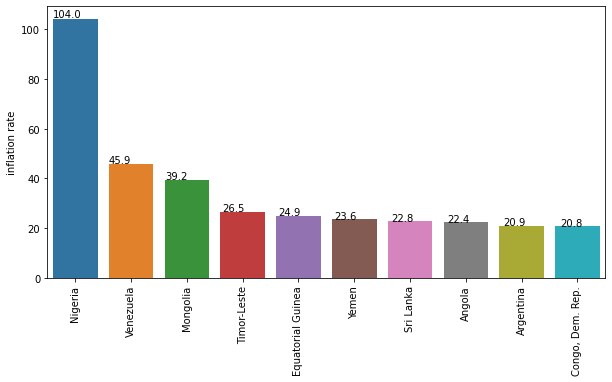

In [26]:
### to check the inflation rate
plt.figure(figsize = (10,5))
child_inflation = countr[['country','inflation']].sort_values('inflation', ascending = False).head(10)
ax = sns.barplot(x='country', y='inflation', data= child_inflation)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'inflation rate')
plt.xticks(rotation=90)
plt.show()

-As we can see that some of poor countries which having low net income has higher inflation rate which raises the cost of living results in uncertainity of life.
    -As nigeria inflation is very high which indicates the higher difficulty for survival

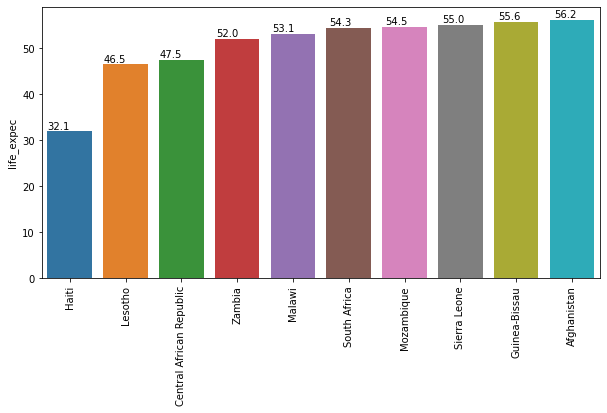

In [27]:
## to check life expectation rate
plt.figure(figsize = (10,5))
child_inflation = countr[['country','life_expec']].sort_values('life_expec', ascending = True).head(10)
ax = sns.barplot(x='country', y='life_expec', data= child_inflation)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
ax.set(xlabel = '', ylabel= 'life_expec')
plt.xticks(rotation=90)
plt.show()

Haiti is life expectancy is very very less as higher child mortality rate as higher deaths of children occured due to poor health conditions , need more medical aid for this country

## Multivariate Analysis


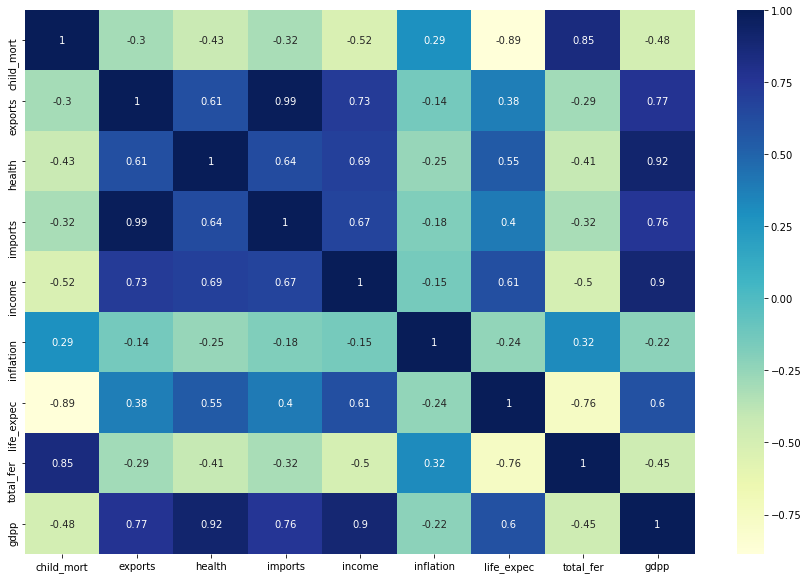

In [28]:
# Heatmap to understand the attributes dependency

# Let us draw heatmap to understand the corelation better.
plt.figure(figsize = (15,10))  
sns.heatmap(countr.corr(),annot = True,cmap="YlGnBu")

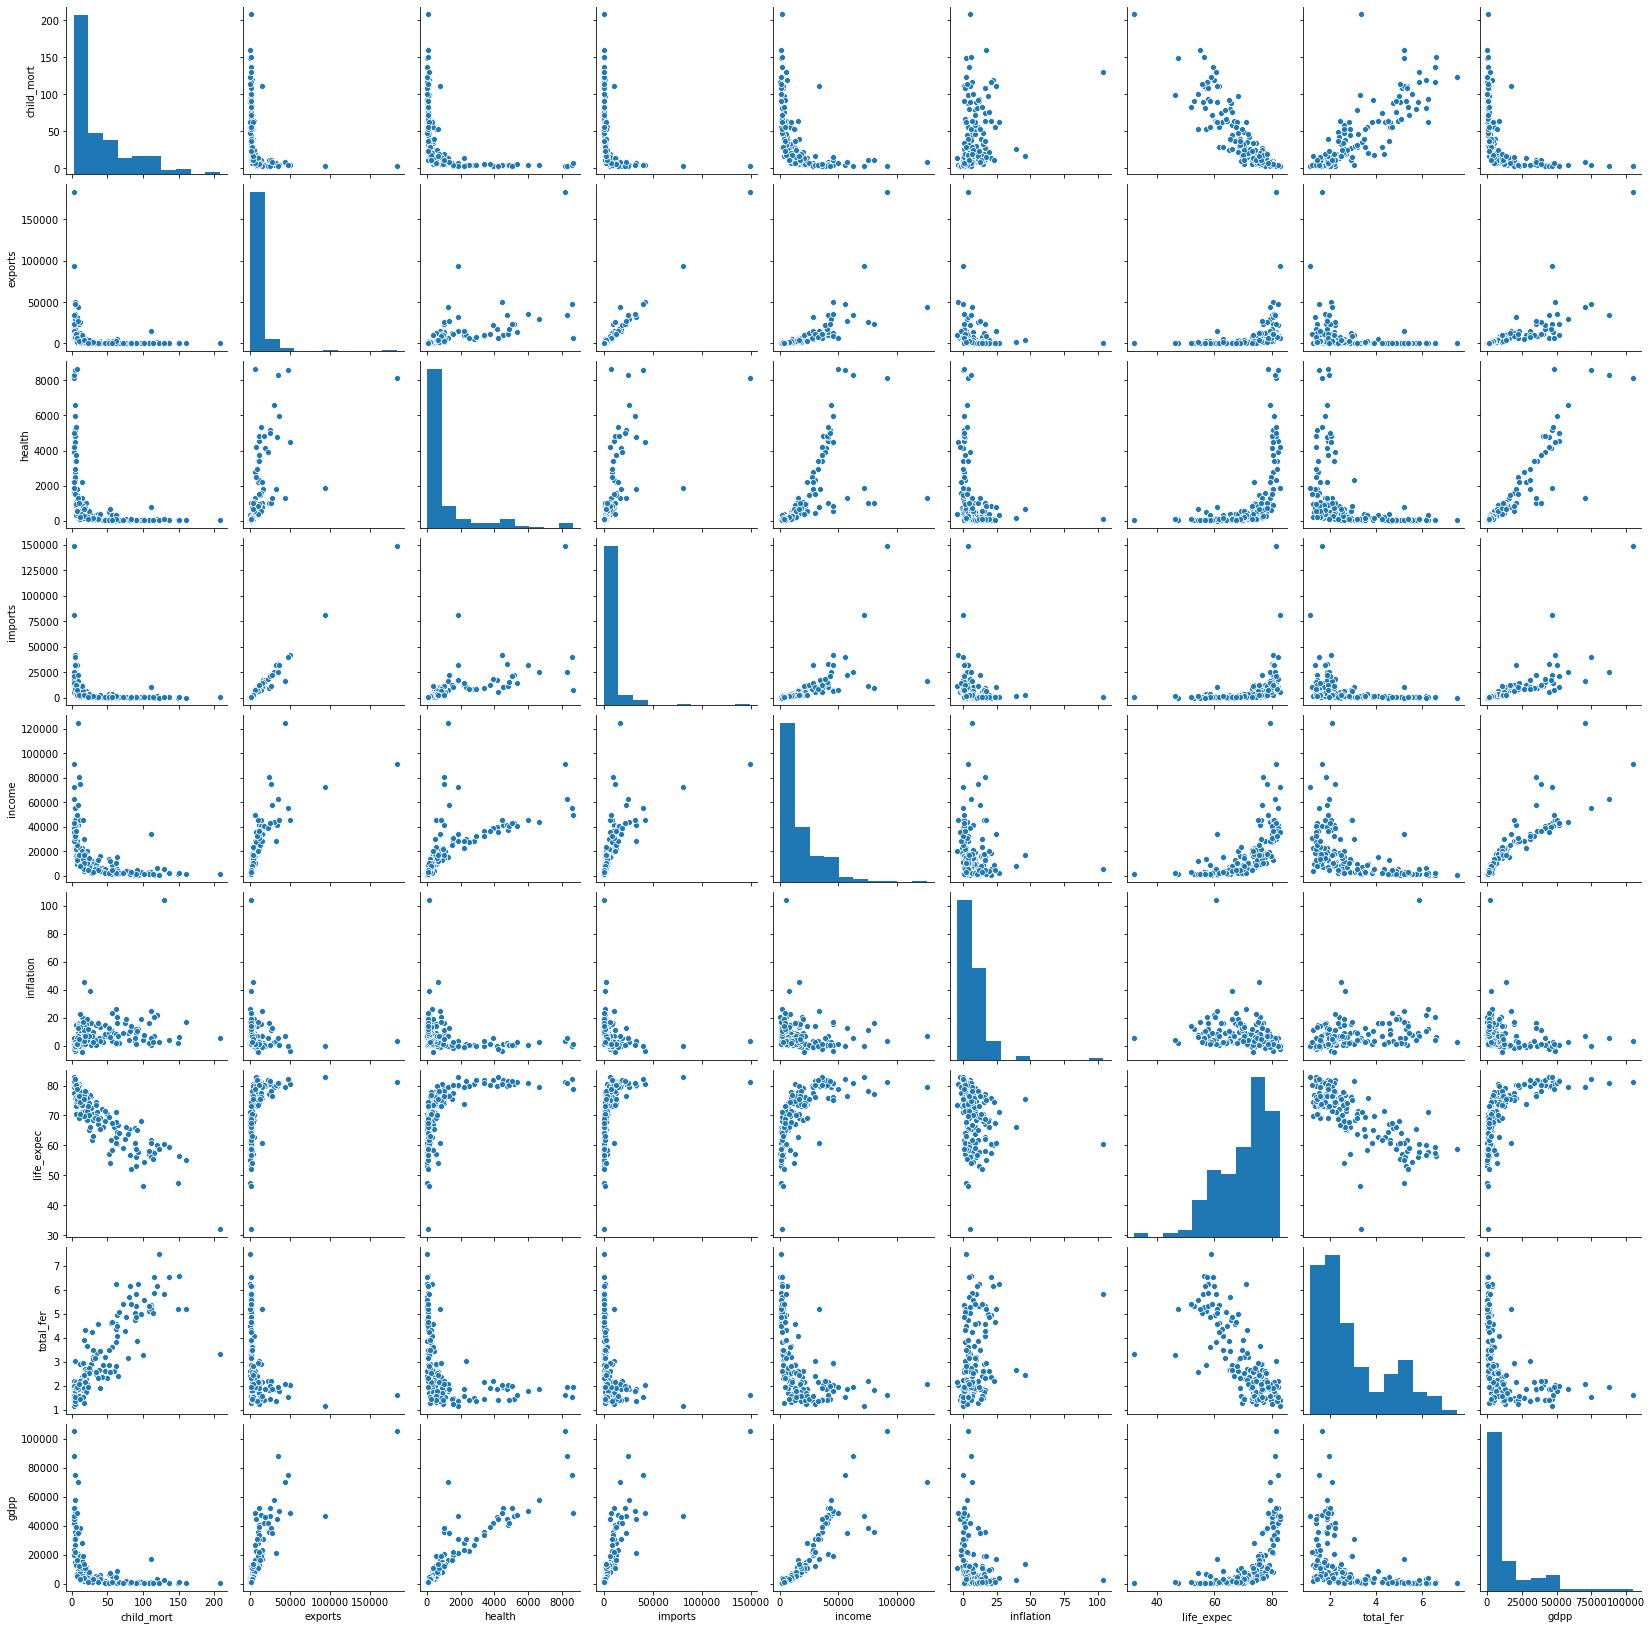

In [29]:
# Pairplot of all numeric columns
sns.pairplot(countr)

### Checking Outliers


In [30]:
countr.describe(percentiles=[.25,.5,.75,.90,.95,.99])

child_mort        exports       health        imports         income  \
count  167.000000     167.000000   167.000000     167.000000     167.000000   
mean    38.270060    7420.618847  1056.733204    6588.352108   17144.688623   
std     40.328931   17973.885795  1801.408906   14710.810418   19278.067698   
min      2.600000       1.076920    12.821200       0.651092     609.000000   
25%      8.250000     447.140000    78.535500     640.215000    3355.000000   
50%     19.300000    1777.440000   321.886000    2045.580000    9960.000000   
75%     62.100000    7278.000000   976.940000    7719.600000   22800.000000   
90%    100.220000   17760.600000  3825.416000   15034.280000   41220.000000   
95%    116.000000   31385.100000  4966.701000   24241.560000   48290.000000   
99%    153.400000   64794.260000  8410.330400   55371.390000   84374.000000   
max    208.000000  183750.000000  8663.600000  149100.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
90%     16.640000   80.400000    5.322000   41840.000000  
95%     20.870000   81.400000    5.861000   48610.000000  
99%     41.478000   82.370000    6.563600   79088.000000  
max    104.000000   82.800000    7.490000  105000.000000

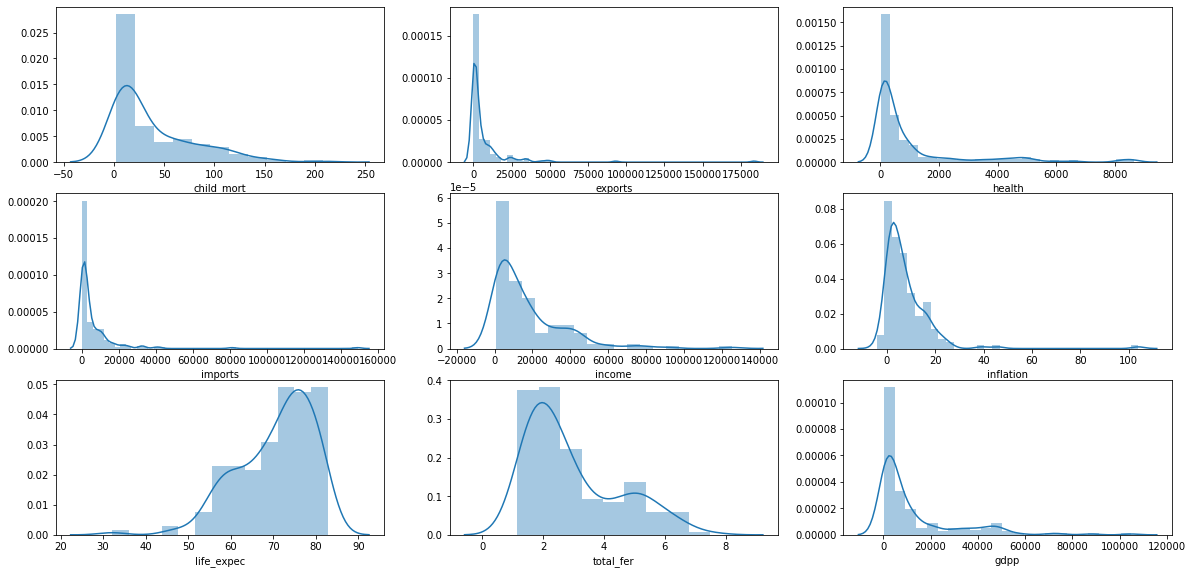

In [31]:
plt.figure(figsize = (20,20))

feature = countr.columns[1::1]
for i in enumerate(feature):
    plt.subplot(6,3, i[0]+1)
    sns.distplot(countr[i[1]])

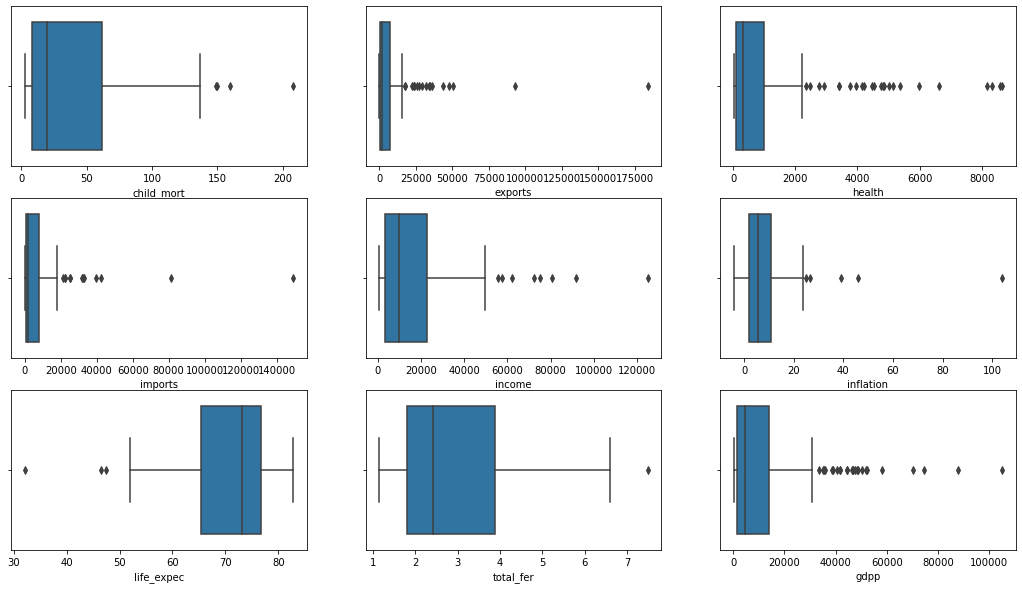

In [32]:
plt.figure(figsize=(18, 10))
plt.subplot(3, 3, 1)
sns.boxplot(countr.child_mort)
plt.subplot(3, 3, 2)
sns.boxplot(countr.exports)
plt.subplot(3, 3, 3)
sns.boxplot(countr.health)
plt.subplot(3, 3, 4)
sns.boxplot(countr.imports)
plt.subplot(3, 3, 5)
sns.boxplot(countr.income)
plt.subplot(3, 3, 6)
sns.boxplot(countr.inflation)
plt.subplot(3, 3, 7)
sns.boxplot(countr.life_expec)
plt.subplot(3, 3, 8)
sns.boxplot(countr.total_fer)
plt.subplot(3, 3, 9)
sns.boxplot(countr.gdpp)
plt.show()

### Scaling the data


In [33]:
countr.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [34]:
# Importing the scaling library - StandardScaler

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [35]:
# New dataframe with only Numeric variables, for scaling

num_countr=countr[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']].copy()

In [36]:
num_countr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


In [37]:
num_countr.describe()

child_mort        exports       health        imports         income  \
count  167.000000     167.000000   167.000000     167.000000     167.000000   
mean    38.270060    7420.618847  1056.733204    6588.352108   17144.688623   
std     40.328931   17973.885795  1801.408906   14710.810418   19278.067698   
min      2.600000       1.076920    12.821200       0.651092     609.000000   
25%      8.250000     447.140000    78.535500     640.215000    3355.000000   
50%     19.300000    1777.440000   321.886000    2045.580000    9960.000000   
75%     62.100000    7278.000000   976.940000    7719.600000   22800.000000   
max    208.000000  183750.000000  8663.600000  149100.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000  
50%      5.390000   73.100000    2.410000    4660.000000  
75%     10.750000   76.800000    3.880000   14050.000000  
max    104.000000   82.800000    7.490000  105000.000000

In [38]:

# Scaling the dataset with Standard Scaler 

scaled_df=scaler.fit_transform(num_countr)
scaled_df=pd.DataFrame(scaled_df,columns=num_countr.columns)

scaled_df.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -0.411011 -0.565040 -0.432276 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.350191 -0.439218 -0.313677 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.318526 -0.484826 -0.353720 -0.220844   0.789274    0.670423   
3    2.007808 -0.291375 -0.532363 -0.345953 -0.585043   1.387054   -1.179234   
4   -0.695634 -0.104331 -0.178771  0.040735  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817

### Hopkins Statistics: 

In [39]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

In [40]:
# Calculating Hopkins score to know whether the data is good for clustering or not.

def hopkins(X):
    d = X.shape[1]
    n = len(X)
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    HS = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(HS):
        print(ujd, wjd)
        HS = 0
 
    return HS

In [41]:
#Use the Hopkins Statistic function by passing the above dataframe as a paramter
hopkins(scaled_df)

0.9209439912402653

### K-Means Clustering 

In [42]:
from sklearn.metrics import silhouette_score

ss = []
for k in range(2,11):
    kmean = KMeans(n_clusters=k).fit(scaled_df)
    ss.append([k, silhouette_score(scaled_df, kmean.labels_)])

sil = pd.DataFrame(ss)

In [43]:
sil

0         1
0   2  0.458633
1   3  0.421862
2   4  0.429147
3   5  0.430775
4   6  0.321105
5   7  0.301293
6   8  0.305829
7   9  0.236809
8  10  0.254479

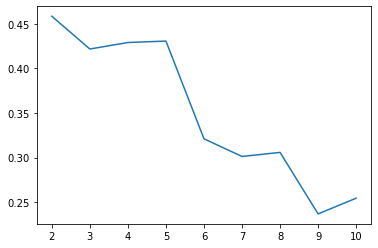

In [44]:
plt.plot(sil[0], sil[1]);

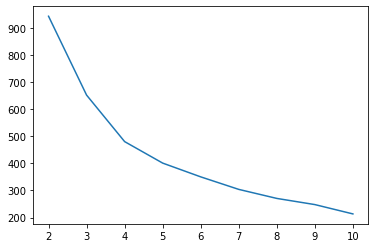

In [45]:
ssd = []
for k in range(2, 11):
    kmean = KMeans(n_clusters = k).fit(scaled_df)
    ssd.append([k, kmean.inertia_])
    
temp = pd.DataFrame(ssd)
plt.plot(temp[0], temp[1]);

In [46]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(scaled_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.45863306035476264
For n_clusters=3, the silhouette score is 0.4218615812599681
For n_clusters=4, the silhouette score is 0.4277518271600435
For n_clusters=5, the silhouette score is 0.43077513396770467
For n_clusters=6, the silhouette score is 0.3927936961757552
For n_clusters=7, the silhouette score is 0.3094054909508284
For n_clusters=8, the silhouette score is 0.3220272610230326


In [47]:
# K=3
# Final Kmean Clustering

kmean = KMeans(n_clusters = 3, random_state = 0)
kmean.fit(scaled_df)

KMeans(n_clusters=3, random_state=0)

In [48]:
kmean.cluster_centers_

array([[ 1.32661038, -0.36504233, -0.52444743, -0.39281661, -0.68923797,
         0.39181237, -1.27627565,  1.3543418 , -0.60496339],
       [-0.82629395,  1.31794823,  1.82094465,  1.3111162 ,  1.71870094,
        -0.45233422,  1.12317044, -0.78661849,  1.92353171],
       [-0.44550624, -0.21297273, -0.28365905, -0.1962204 , -0.16527697,
        -0.0674905 ,  0.32760944, -0.47234163, -0.27275434]])

In [49]:
kmean.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [50]:
countr.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

In [51]:
countr['labels'] = kmean.labels_

In [52]:
countr.head()

country  child_mort  exports    health   imports  income  \
0          Afghanistan        90.2    55.30   41.9174   248.297    1610   
1              Albania        16.6  1145.20  267.8950  1987.740    9930   
2              Algeria        27.3  1712.64  185.9820  1400.440   12900   
3               Angola       119.0  2199.19  100.6050  1514.370    5900   
4  Antigua and Barbuda        10.3  5551.00  735.6600  7185.800   19100   

   inflation  life_expec  total_fer   gdpp  labels  
0       9.44        56.2       5.82    553       0  
1       4.49        76.3       1.65   4090       2  
2      16.10        76.5       2.89   4460       2  
3      22.40        60.1       6.16   3530       0  
4       1.44        76.8       2.13  12200       2

In [53]:
countr['labels'].value_counts()

2    91
0    48
1    28
Name: labels, dtype: int64

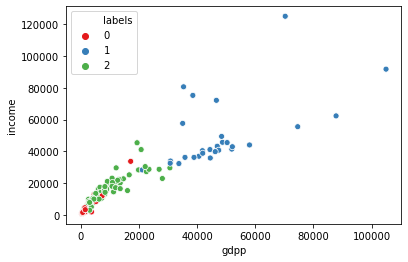

In [54]:
# scatter plot for gdpp, income  
sns.scatterplot(x='gdpp', y='income', hue= 'labels', data=countr, palette='Set1'); 

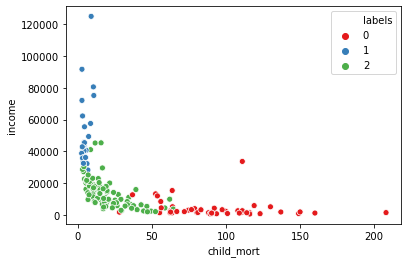

In [55]:
# scatter plot for Child_mort, income
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'labels', data = countr, palette = 'Set1');

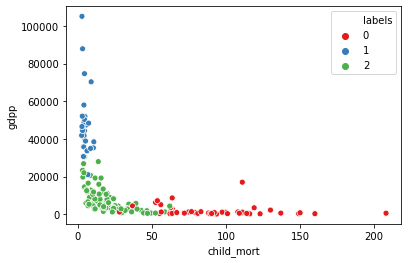

In [56]:
# scatter plot for Child_mort, gdpp 
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue = 'labels', data = countr, palette = 'Set1');

### CLUSTER PROFILING

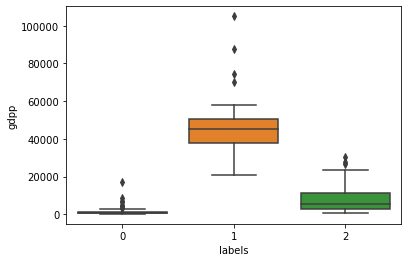

In [57]:
# plot the gdpp variable with labels
sns.boxplot(x='labels', y='gdpp', data=countr);

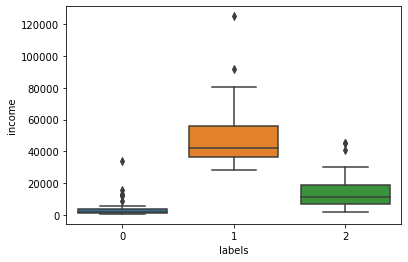

In [58]:
# plot the gdpp variable with cluster_id
#plt.figure(figsize=(30,18))
sns.boxplot(x='labels', y='income', data=countr);

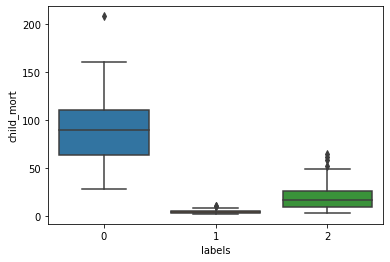

In [59]:
# plot the child_mort variable with cluster_id
#plt.figure(figsize=(30,18))
sns.boxplot(x='labels', y='child_mort', data=countr);

As we have 7 clusters formed , So now we will make 7 different df of each cluster to plot and analyse differents components within separately that to choose the cluster which need direct aid from NGO

In [60]:
countr[['child_mort','income', 'gdpp', 'labels']].groupby('labels').mean()

child_mort        income          gdpp
labels                                        
0        91.610417   3897.354167   1909.208333
1         5.046429  50178.571429  48114.285714
2        20.357143  13968.021978   7979.912088

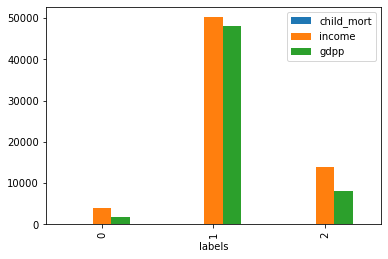

In [61]:
countr[['child_mort','income', 'gdpp', 'labels']].groupby('labels').mean().plot(kind='bar')

In [62]:
c1 = countr[countr['labels']==1]
c1

country  child_mort   exports   health   imports  income  \
7               Australia         4.8   10276.2  4530.87   10847.1   41400   
8                 Austria         4.3   24059.7  5159.00   22418.2   43200   
15                Belgium         4.5   33921.6  4750.80   33166.8   41100   
23                 Brunei        10.5   23792.2  1002.52    9884.0   80600   
29                 Canada         5.6   13793.4  5356.20   14694.0   40700   
42                 Cyprus         3.6   15461.6  1838.76   17710.0   33900   
44                Denmark         4.1   29290.0  6612.00   25288.0   44000   
53                Finland         3.0   17879.4  4134.90   17278.8   39800   
54                 France         4.2   10880.8  4831.40   11408.6   36900   
58                Germany         4.2   17681.4  4848.80   15507.8   40400   
68                Iceland         2.6   22374.6  3938.60   18142.7   38800   
73                Ireland         4.2   50161.0  4475.53   42125.5   45700   
75                  Italy         4.0    9021.6  3411.74    9737.6   36200   
77                  Japan         3.2    6675.0  4223.05    6052.0   35800   
82                 Kuwait        10.8   25679.5  1012.55   11704.0   75200   
91             Luxembourg         2.8  183750.0  8158.50  149100.0   91700   
98                  Malta         6.8   32283.0  1825.15   32494.0   28300   
110           Netherlands         4.5   36216.0  5985.70   31990.8   45500   
111           New Zealand         6.2   10211.1  3403.70    9436.0   32300   
114                Norway         3.2   34856.6  8323.44   25023.0   62300   
123                 Qatar         9.0   43796.9  1272.43   16731.4  125000   
133             Singapore         2.8   93200.0  1845.36   81084.0   72100   
139                 Spain         3.8    7828.5  2928.78    8227.6   32500   
144                Sweden         3.0   24070.2  5017.23   21204.7   42900   
145           Switzerland         4.5   47744.0  8579.00   39761.8   55500   
157  United Arab Emirates         8.6   27195.0  1281.00   22260.0   57600   
158        United Kingdom         5.2   10969.8  3749.96   11981.2   36200   
159         United States         7.3    6001.6  8663.60    7647.2   49400   

     inflation  life_expec  total_fer    gdpp  labels  
7        1.160        82.0       1.93   51900       1  
8        0.873        80.5       1.44   46900       1  
15       1.880        80.0       1.86   44400       1  
23      16.700        77.1       1.84   35300       1  
29       2.870        81.3       1.63   47400       1  
42       2.010        79.9       1.42   30800       1  
44       3.220        79.5       1.87   58000       1  
53       0.351        80.0       1.87   46200       1  
54       1.050        81.4       2.03   40600       1  
58       0.758        80.1       1.39   41800       1  
68       5.470        82.0       2.20   41900       1  
73      -3.220        80.4       2.05   48700       1  
75       0.319        81.7       1.46   35800       1  
77      -1.900        82.8       1.39   44500       1  
82      11.200        78.2       2.21   38500       1  
91       3.620        81.3       1.63  105000       1  
98       3.830        80.3       1.36   21100       1  
110      0.848        80.7       1.79   50300       1  
111      3.730        80.9       2.17   33700       1  
114      5.950        81.0       1.95   87800       1  
123      6.980        79.5       2.07   70300       1  
133     -0.046        82.7       1.15   46600       1  
139      0.160        81.9       1.37   30700       1  
144      0.991        81.5       1.98   52100       1  
145      0.317        82.2       1.52   74600       1  
157     12.500        76.5       1.87   35000       1  
158      1.570        80.3       1.92   38900       1  
159      1.220        78.7       1.93   48400       1

In [63]:
c2 = countr[countr['labels']==2]
c2

country  child_mort      exports     health  \
1                           Albania        16.6   1145.20000   267.8950   
2                           Algeria        27.3   1712.64000   185.9820   
4               Antigua and Barbuda        10.3   5551.00000   735.6600   
5                         Argentina        14.5   1946.70000   834.3000   
6                           Armenia        18.1    669.76000   141.6800   
9                        Azerbaijan        39.2   3171.12000   343.3920   
10                          Bahamas        13.8   9800.00000  2209.2000   
11                          Bahrain         8.6  14386.50000  1028.7900   
12                       Bangladesh        49.4    121.28000    26.6816   
13                         Barbados        14.2   6320.00000  1275.2000   
14                          Belarus         5.5   3099.42000   338.2830   
16                           Belize        18.8   2525.88000   225.6800   
18                           Bhutan        42.7    926.50000   113.3600   
19                          Bolivia        46.6    815.76000    95.8320   
20           Bosnia and Herzegovina         6.9   1369.17000   511.7100   
22                           Brazil        19.8   1198.40000  1009.1200   
24                         Bulgaria        10.8   3433.68000   469.9080   
27                         Cambodia        44.4    425.22600    44.6448   
30                       Cape Verde        26.5   1082.37000   135.3790   
33                            Chile         8.7   4863.30000  1026.8400   
34                            China        15.7   1199.28000   231.1920   
35                         Colombia        18.6    993.75000   474.3750   
39                       Costa Rica        10.2   2722.40000   893.8000   
41                          Croatia         5.5   5076.00000  1047.6000   
43                   Czech Republic         3.4  13068.00000  1560.2400   
45               Dominican Republic        34.4   1237.15000   338.9900   
46                          Ecuador        25.1   1300.14000   375.5960   
47                            Egypt        29.1    553.80000   121.1600   
48                      El Salvador        19.2    804.31000   206.6090   
51                          Estonia         4.5  10964.60000   880.3800   
52                             Fiji        24.1   2109.70000   177.3900   
57                          Georgia        16.5   1036.00000   298.9600   
60                           Greece         3.9   5944.90000  2770.7000   
61                          Grenada        14.6   1754.06000   431.8820   
62                        Guatemala        35.4    730.14000   193.8550   
65                           Guyana        37.6   1562.56000   163.5520   
67                          Hungary         6.0  10715.80000   960.2300   
69                            India        58.8    305.10000    54.6750   
70                        Indonesia        33.3    755.73000    81.1710   
71                             Iran        19.3   1593.32000   365.6800   
74                           Israel         4.6  10710.00000  2334.7800   
76                          Jamaica        18.1   1464.84000   225.1080   
78                           Jordan        21.1   1777.44000   295.8720   
79                       Kazakhstan        21.5   4008.94000   389.1030   
83                  Kyrgyz Republic        29.6    454.08000    54.3840   
85                           Latvia         7.8   6068.10000   754.8400   
86                          Lebanon        10.3   3171.88000   622.8580   
89                            Libya        16.6   7937.60000   469.4800   
90                        Lithuania         6.1   7836.00000   844.8000   
92                   Macedonia, FYR        10.4   1806.92000   321.8860   
95                         Malaysia         7.9   7881.83000   398.1730   
96                         Maldives        13.2   5509.60000   449.4300   
100                       Mauritius        15.0   409

In [64]:
c0 = countr[countr['labels']==0]
c0

country  child_mort     exports    health    imports  \
0                 Afghanistan        90.2     55.3000   41.9174    248.297   
3                      Angola       119.0   2199.1900  100.6050   1514.370   
17                      Benin       111.0    180.4040   31.0780    281.976   
21                   Botswana        52.5   2768.6000  527.0500   3257.550   
25               Burkina Faso       116.0    110.4000   38.7550    170.200   
26                    Burundi        93.6     20.6052   26.7960     90.552   
28                   Cameroon       108.0    290.8200   67.2030    353.700   
31   Central African Republic       149.0     52.6280   17.7508    118.190   
32                       Chad       150.0    330.0960   40.6341    390.195   
36                    Comoros        88.2    126.8850   34.6819    397.573   
37           Congo, Dem. Rep.       116.0    137.2740   26.4194    165.664   
38                Congo, Rep.        63.9   2331.7400   67.4040   1498.780   
40              Cote d'Ivoire       111.0    617.3200   64.6600    528.260   
49          Equatorial Guinea       111.0  14671.8000  766.0800  10071.900   
50                    Eritrea        55.2     23.0878   12.8212    112.306   
55                      Gabon        63.7   5048.7500  306.2500   1653.750   
56                     Gambia        80.3    133.7560   31.9778    239.974   
59                      Ghana        74.7    386.4500   68.3820    601.290   
63                     Guinea       109.0    196.3440   31.9464    279.936   
64              Guinea-Bissau       114.0     81.5030   46.4950    192.544   
66                      Haiti       208.0    101.2860   45.7442    428.314   
72                       Iraq        36.9   1773.0000  378.4500   1534.500   
80                      Kenya        62.2    200.1690   45.9325    324.912   
81                   Kiribati        62.7    198.1700  168.3700   1190.510   
84                        Lao        78.9    403.5600   50.9580    562.020   
87                    Lesotho        99.7    460.9800  129.8700   1181.700   
88                    Liberia        89.3     62.4570   38.5860    302.802   
93                 Madagascar        62.2    103.2500   15.5701    177.590   
94                     Malawi        90.5    104.6520   30.2481    160.191   
97                       Mali       137.0    161.4240   35.2584    248.508   
99                 Mauritania        97.4    608.4000   52.9200    734.400   
106                Mozambique       101.0    131.9850   21.8299    193.578   
108                   Namibia        56.0   2480.8200  351.8820   3150.330   
112                     Niger       123.0     77.2560   17.9568    170.868   
113                   Nigeria       130.0    589.4900  118.1310    405.420   
116                  Pakistan        92.1    140.4000   22.8800    201.760   
126                    Rwanda        63.6     67.5600   59.1150    168.900   
129                   Senegal        66.8    249.0000   56.6000    403.000   
132              Sierra Leone       160.0     67.0320   52.2690    137.655   
136           Solomon Islands        28.1    635.9700  110.2950   1047.480   
137              South Africa        53.7   2082.0800  650.8320   1994.720   
142                     Sudan        76.7    291.5600   93.5360    254.560   
147                  Tanzania        71.9    131.2740   42.1902    204.282   
149               Timor-Leste        62.6     79.2000  328.3200   1000.800   
150                      Togo        90.3    196.1760   37.3320    279.624   
155                    Uganda        81.0    101.7450   53.6095    170.170   
165                     Yemen        56.3    393.0000   67.8580    450.640   
166                    Zambia        83.1    540.2000   85.9940    451.140   

     income  inflation  life_expec  total_fer   gdpp  labels  
0      1610      9.440        56.2       5.82    553       0  
3      5900     22.400        60.1       6.16   3530       0  
17     182

##### Number of countries in each cluster: 

In [65]:
c1['labels'].value_counts()

1    28
Name: labels, dtype: int64

In [66]:
c2['labels'].value_counts()

2    91
Name: labels, dtype: int64

In [67]:
c0['labels'].value_counts()

0    48
Name: labels, dtype: int64

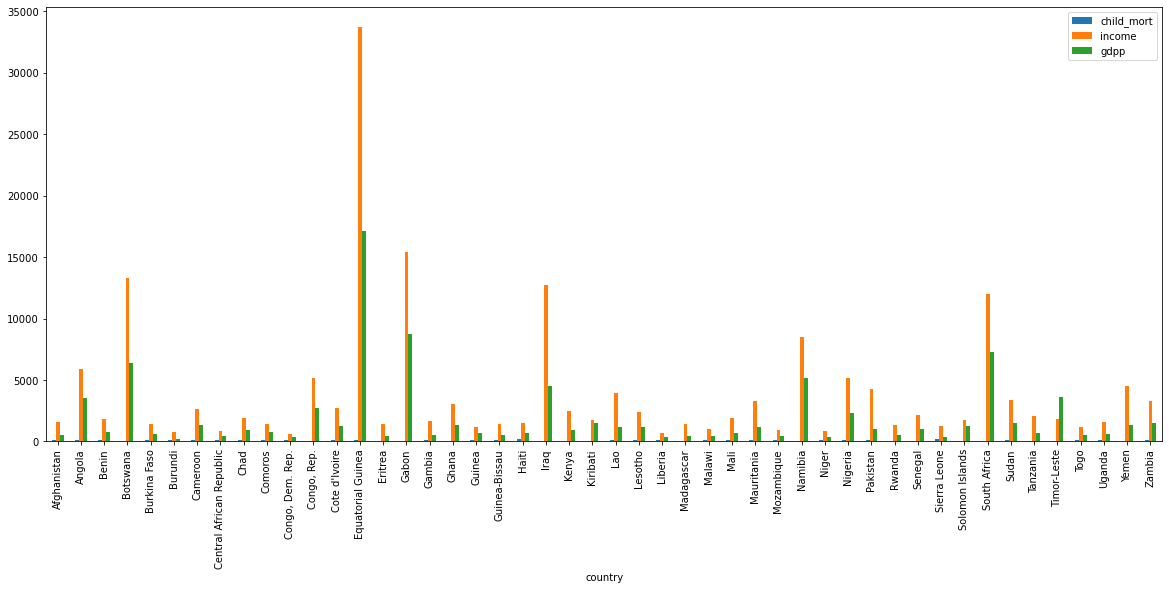

In [68]:
#Analyse Each Cluster based on 3 variable; gdpp, income, child_mort
c0.plot(x='country', y=['child_mort','income','gdpp'], kind='bar',figsize=(20,8))

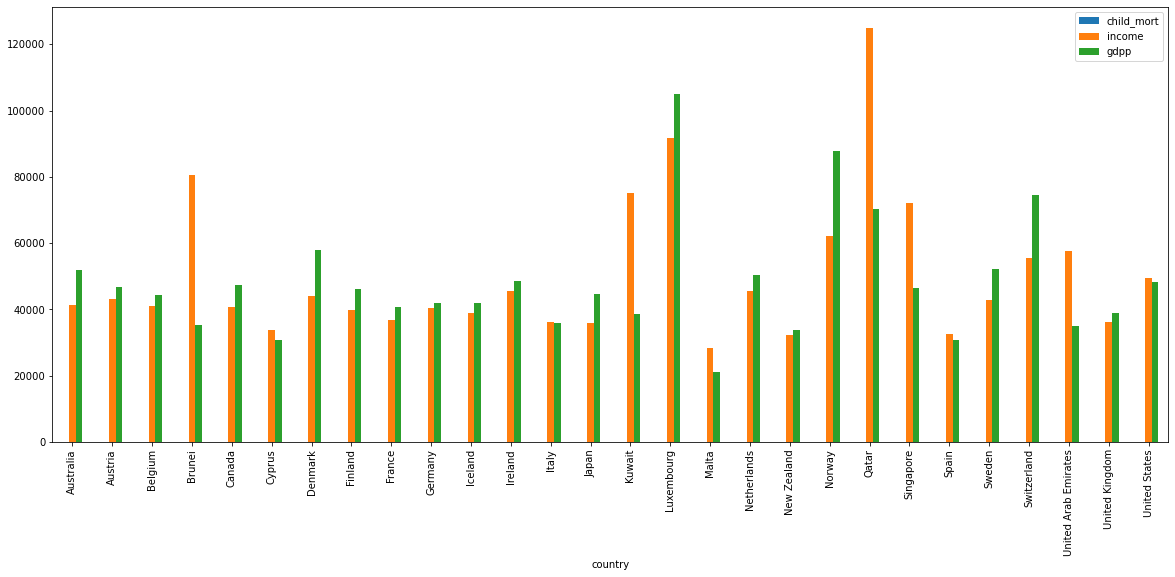

In [69]:
#Analyse Each Cluster based on 3 variable; gdpp, income, child_mort
c1.plot(x='country', y=['child_mort','income','gdpp'], kind='bar',figsize=(20,8))

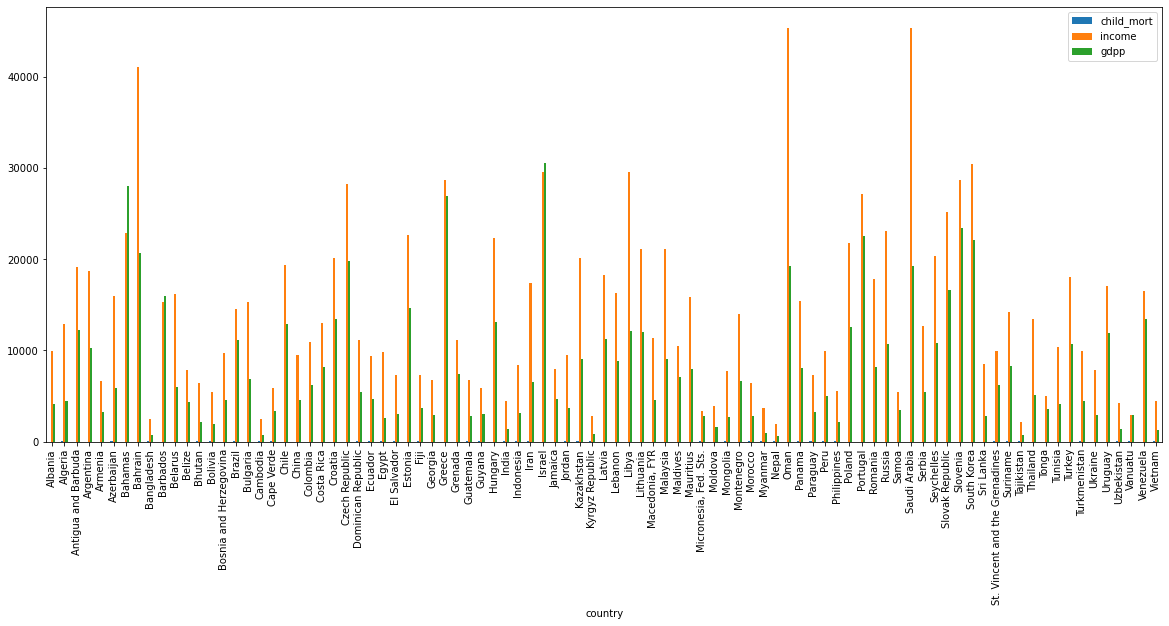

In [70]:
#Analyse Each Cluster based on 3 variable; gdpp, income, child_mort
c2.plot(x='country', y=['child_mort','income','gdpp'], kind='bar',figsize=(20,8))

Text(0.5, 0, 'gdpp')

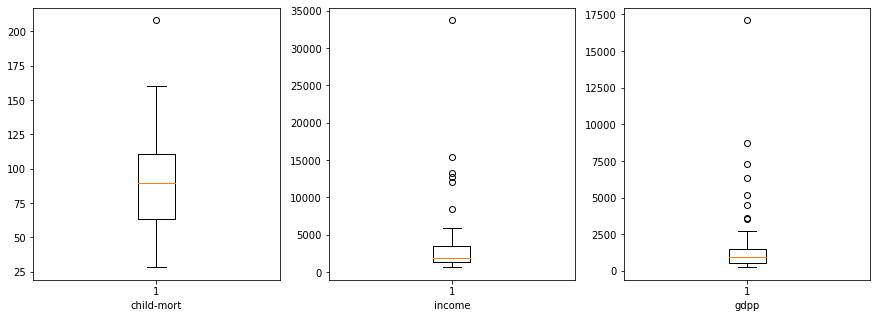

In [71]:
# Analysis through boxplot
#cluster 0
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.boxplot(c0['child_mort'])
plt.xlabel('child-mort')

plt.subplot(1,3,2)
plt.boxplot(c0['income'])
plt.xlabel('income')

plt.subplot(1,3,3)
plt.boxplot(c0['gdpp'])
plt.xlabel('gdpp')

Text(0.5, 0, 'gdpp')

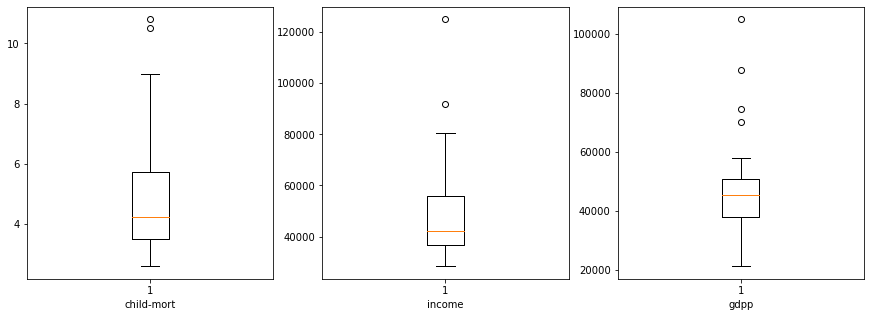

In [72]:
#We see that cluster 1 has a high child mortgage value and is the cluster of interest, lets reconfirm the same! 
# Analysis through boxplot
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.boxplot(c1['child_mort'])
plt.xlabel('child-mort')

plt.subplot(1,3,2)
plt.boxplot(c1['income'])
plt.xlabel('income')

plt.subplot(1,3,3)
plt.boxplot(c1['gdpp'])
plt.xlabel('gdpp')

Text(0.5, 0, 'gdpp')

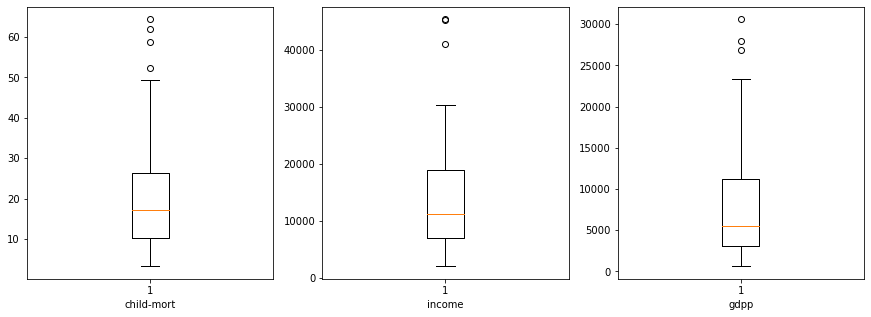

In [73]:
# cluster 2
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.boxplot(c2['child_mort'])
plt.xlabel('child-mort')

plt.subplot(1,3,2)
plt.boxplot(c2['income'])
plt.xlabel('income')

plt.subplot(1,3,3)
plt.boxplot(c2['gdpp'])
plt.xlabel('gdpp')

In [74]:
c1.sort_values(by=['gdpp', 'income', 'child_mort'], ascending= [True, True, False]).head(10)

country  child_mort  exports   health  imports  income  \
98                  Malta         6.8  32283.0  1825.15  32494.0   28300   
139                 Spain         3.8   7828.5  2928.78   8227.6   32500   
42                 Cyprus         3.6  15461.6  1838.76  17710.0   33900   
111           New Zealand         6.2  10211.1  3403.70   9436.0   32300   
157  United Arab Emirates         8.6  27195.0  1281.00  22260.0   57600   
23                 Brunei        10.5  23792.2  1002.52   9884.0   80600   
75                  Italy         4.0   9021.6  3411.74   9737.6   36200   
82                 Kuwait        10.8  25679.5  1012.55  11704.0   75200   
158        United Kingdom         5.2  10969.8  3749.96  11981.2   36200   
54                 France         4.2  10880.8  4831.40  11408.6   36900   

     inflation  life_expec  total_fer   gdpp  labels  
98       3.830        80.3       1.36  21100       1  
139      0.160        81.9       1.37  30700       1  
42       2.010        79.9       1.42  30800       1  
111      3.730        80.9       2.17  33700       1  
157     12.500        76.5       1.87  35000       1  
23      16.700        77.1       1.84  35300       1  
75       0.319        81.7       1.46  35800       1  
82      11.200        78.2       2.21  38500       1  
158      1.570        80.3       1.92  38900       1  
54       1.050        81.4       2.03  40600       1

In [75]:
scaled_df.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -0.411011 -0.565040 -0.432276 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.350191 -0.439218 -0.313677 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.318526 -0.484826 -0.353720 -0.220844   0.789274    0.670423   
3    2.007808 -0.291375 -0.532363 -0.345953 -0.585043   1.387054   -1.179234   
4   -0.695634 -0.104331 -0.178771  0.040735  0.101732  -0.601749    0.704258   

   total_fer      gdpp  
0   1.902882 -0.679180  
1  -0.859973 -0.485623  
2  -0.038404 -0.465376  
3   2.128151 -0.516268  
4  -0.541946 -0.041817

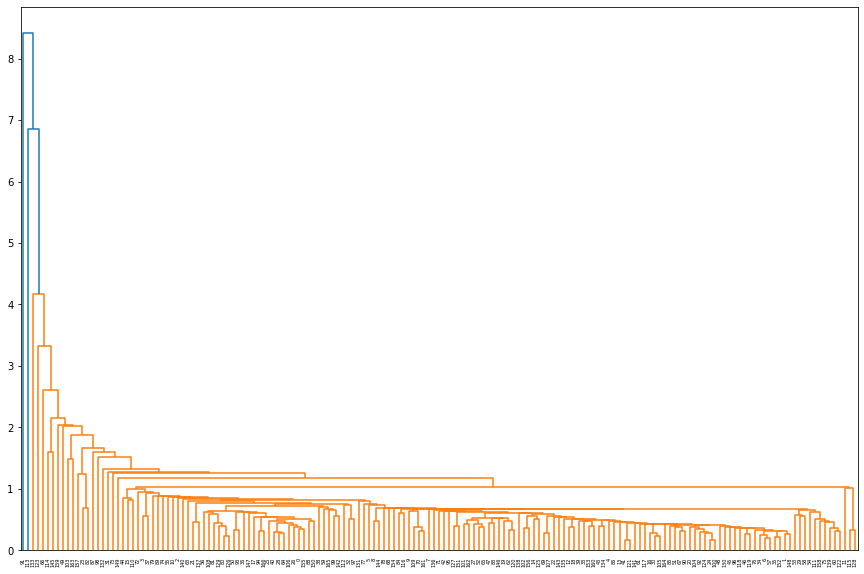

In [76]:
# single linkage
plt.figure(figsize = (15,10))  
mergings = linkage(scaled_df, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

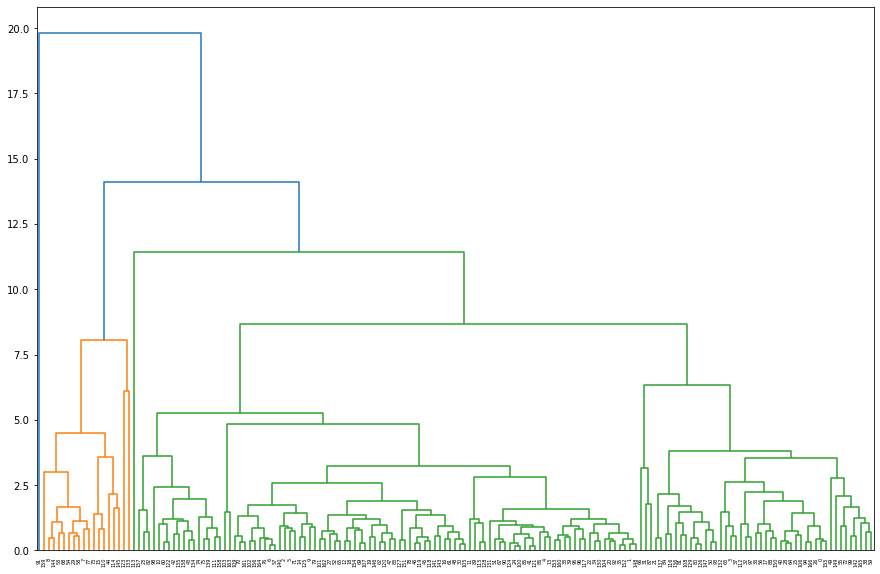

In [77]:
# complete linkage
plt.figure(figsize = (15,10))  
mergings = linkage(scaled_df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [78]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [79]:
# assign cluster labels
scaled_df['cluster_labels'] = cluster_labels
scaled_df.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    1.291532 -0.411011 -0.565040 -0.432276 -0.808245   0.157336   -1.619092   
1   -0.538949 -0.350191 -0.439218 -0.313677 -0.375369  -0.312347    0.647866   
2   -0.272833 -0.318526 -0.484826 -0.353720 -0.220844   0.789274    0.670423   
3    2.007808 -0.291375 -0.532363 -0.345953 -0.585043   1.387054   -1.179234   
4   -0.695634 -0.104331 -0.178771  0.040735  0.101732  -0.601749    0.704258   

   total_fer      gdpp  cluster_labels  
0   1.902882 -0.679180               0  
1  -0.859973 -0.485623               0  
2  -0.038404 -0.465376               0  
3   2.128151 -0.516268               0  
4  -0.541946 -0.041817               0

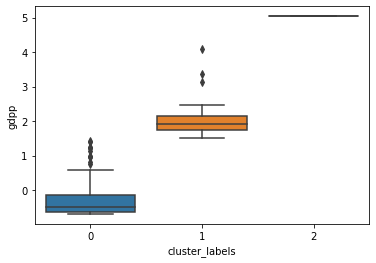

In [80]:
# plots based on cluster label and GDP after Hierachichal Clustering 
sns.boxplot(x='cluster_labels', y='gdpp', data=scaled_df);

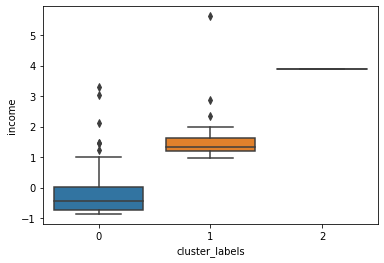

In [81]:
# plots based on cluster label and income after Hierachichal Clustering 
sns.boxplot(x='cluster_labels', y='income', data=scaled_df);

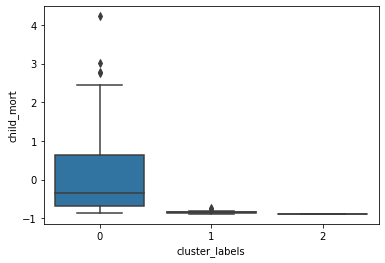

In [82]:
# plots based on cluster label and child mortgage after Hierachichal Clustering 
sns.boxplot(x='cluster_labels', y='child_mort', data=scaled_df);

In [83]:
cluster_kmean = countr[scaled_df['cluster_labels']==0]
cluster_kmean.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

country  child_mort   exports   health  imports  income  \
26                    Burundi        93.6   20.6052  26.7960   90.552     764   
88                    Liberia        89.3   62.4570  38.5860  302.802     700   
37           Congo, Dem. Rep.       116.0  137.2740  26.4194  165.664     609   
112                     Niger       123.0   77.2560  17.9568  170.868     814   
132              Sierra Leone       160.0   67.0320  52.2690  137.655    1220   
93                 Madagascar        62.2  103.2500  15.5701  177.590    1390   
106                Mozambique       101.0  131.9850  21.8299  193.578     918   
31   Central African Republic       149.0   52.6280  17.7508  118.190     888   
94                     Malawi        90.5  104.6520  30.2481  160.191    1030   
50                    Eritrea        55.2   23.0878  12.8212  112.306    1420   

     inflation  life_expec  total_fer  gdpp  labels  
26       12.30        57.7       6.26   231       0  
88        5.47        60.8       5.02   327       0  
37       20.80        57.5       6.54   334       0  
112       2.55        58.8       7.49   348       0  
132      17.20        55.0       5.20   399       0  
93        8.79        60.8       4.60   413       0  
106       7.64        54.5       5.56   419       0  
31        2.01        47.5       5.21   446       0  
94       12.10        53.1       5.31   459       0  
50       11.60        61.7       4.61   482       0

                                                     -Thank you- 
